## The Art and Science of Cybersecurity Attack Detection: A Hybrid Approach

This project aims to improve cyber security by developing a machine learning and rule-based approach to detect cyber attacks. The approach involves analyzing network data to identify potential attacks by identifying correlations between various variables. By completing this project, you will be able to understand how to analyze network data and identify the variables associated with cyber attacks. By leveraging machine learning algorithms and rule-based approaches, this project helps to improve the accuracy and efficiency of cyber attack detection, thereby enhancing the security of digital networks and systems. This project is a valuable first step towards becoming a cyber security expert.

## 1. Objectives¶

Our main goal is to understand how attacks happen and what are the important indicators of attack. by knowing that, we can implement a monitoring system for attack detection. By completing this project, you will be able to apply your learnings to real-world scenarios and contribute to the ongoing effort to secure the cyber realm.

After completing this lab you will be able to:

Understand how cyber attacks occur and identify important indicators of attacks.

Implement a monitoring system for attack detection using both rule-based and machine learning approaches.
    
Learn how to visualize variables in network data.
    
Gain experience in using machine learning algorithms such as Random Forest for classification and feature ranking.
                                                                          
Enhance your knowledge and skills in cybersecurity and introducing powerful tools to equipped to detect and prevent cyber attacks.

## 2.2 Importing Required Libraries

import some essential libraries

In [1]:
# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

#import shap
import skillsnetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

## 3. Strategies to Detect Cyber Attacks

#### The first approach to detecting cyber attacks is to use rule-based system.

These systems use a set of predefined rules to identify potential attacks based on known attack patterns.

For example, a rule might flag an attack if the source to destination time to live (sttl) value is less than 10 and the count of states time to live (ct_state_ttl) value is greater than 100. While rule-based systems can be effective in detecting known attacks, they may also produce false positives, so it's important to validate the alerts generated by these systems.

| <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/images/simple_rule_system.png" width="400" alt="Simple Rule-Based System"></img> |
|:--:| 
| *Simple Rule-Based System* |

### Another approach to detecting cyber attacks is to use machine learning algorithms,

such as Random Forest and adaboost. These algorithms are trained on a large dataset of network packets and can be used to identify anomalies in real-time network traffic that might indicate an attack. For example, a machine learning model might detect an attack if the destination to source transaction bytes (rate) value is greater than 10,000.

### In addition to these automated methods, human analysis can play a critical role in identifying cyber attacks. 

Human analysts can use their expertise to interpret the data and understand the context in which the attack is taking place. They can also validate the alerts generated by automated systems and take into account the broader context of the organization when analyzing data. For example, they may understand that a particular system is undergoing maintenance and can disregard anomalies in the data that might otherwise indicate an attack.

### Therefore, our strategy involves utilizing establishing a rule-based system as the first layer of detection.

Then, we utilize a machine learning algorithm to pinpoint attacks. Finally, we dive deep into the variables to understand their significance and examine their importance as indicators of cyber attacks. This will contribute to developing cyber security knowledge for human analysis.

## 4. Cyber Attack Data
The data is collected by the University of New South Wales (Australia). That includes records of different types of cyber attacks. The dataset contains network packets captured in the Cyber Range Lab of UNSW Canberra. The data is provided in two sets of training and testing data. We combine them to create one set of larger data.

In [2]:
## loading the data
training = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/UNSW_NB15_training-set.csv")
testing = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


To achieve a better performance, we will create a larger dataset and assign 70% for training and 30% to testing.

In [3]:
# checking if all the columns are similar
all(training.columns == testing.columns)

True

In [4]:
# creating one-whole dataframe which contains all data and drop the 'id' column
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

# print one attack sample
df.head(2)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0


The dataset includes 43 variables regarding monitoring the network and 2 variables that define if an attack happens (label) and the types of attacks (attack_cat). The description of all the variables is available at the end of this notebook.

Lets quick look on the types of attacks.

In [5]:
# getting the attack category column 
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

The dataset includes nine types of attacks, including:


Fuzzers: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.


Analysis: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.


Backdoors: Attack that involves creating a hidden entry point into a system for later use by the attacker.
                                                                           

DoS (Denial of Service): Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.


Exploits: Attack that leverages a vulnerability in a system to gain unauthorized access or control.


Generic: A catch-all category that includes a variety of different attack types that do not fit into the other categories.
    

Reconnaissance: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.


Shellcode: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.
    

Worms: A type of malware that spreads itself automatically to other systems, often causing harm in the process.


These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.

## 4.1. Data Exploration


In this section, we briefly explore our dataset.


In [6]:
# exploring the types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

As we can see, some variables, that are categorical, are defined as strings. In the following cell we convert them into categorical type provided by `pandas`.


In [8]:
# some columns should be change from string to categoriacal
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category') # keep the nomical info for attack info

Exploring how many records of different types of attacks are in the dataset.


## 5. Rule-Based System

| <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX0Q8REN/images/simple_rule_system.png" width="400" alt="Simple Rule-Based System"></img> |
|:--:| 
| *Simple Rule-Based System* |

Both **rule-based systems and machine learning systems** have their own strengths and weaknesses, and using both together can provide a more comprehensive and effective approach to detecting cyber attacks. Here are a few reasons why:

1. Explainability: Rule-based systems provide clear and concise rules that can be easily understood and interpreted by human experts. This makes it easier to understand how the system is making its predictions and to validate the results.

2. Robustness: Rule-based systems are less likely to be affected by unexpected changes in the data distribution compared to machine learning models. They can still provide accurate results even when the data changes, as long as the rules remain valid.

3. Speed: Rule-based systems can be much faster than machine learning models, especially for simple problems. This can be important in real-time monitoring systems where the response time needs to be fast.

4. Complementary strengths: Rule-based systems and machine learning models can complement each other. Rule-based systems can be used to detect simple, well-defined attacks, while machine learning models can be used to detect more complex, subtle attacks.

In our project, we first employ rule-based model and then we utilize machine learning model.
By combining rule-based systems and machine learning models, it is possible to take advantage of the strengths of each approach to create a more effective and comprehensive system for detecting cyber attacks.

### 5.1. Evaluation Metric

In the rule-based model, we are looking for higher recall rate because we are sensitive to alarm potential threats, and we can not afford to miss attacks (FALSE NEGATIVE). Recall (or True Positive Rate) is calculated by dividing the true positives (actual attacks) by anything that should have been predicted as positive (detected and non-detected attacks).


|<img src="https://keytodatascience.com/wp-content/uploads/2019/09/values.jpg" width="400" alt="IBM Watson"> |
|:--:| 
| Learn more about confusion matrix (and image credit): https://keytodatascience.com/confusion-matrix/  |


In [9]:
# separating the target columns in the training and testing data 
from sklearn.model_selection import train_test_split

# Split the data into variables and target variables
# let's exclude label columns 
X = df.loc[:, ~df.columns.isin(['attack_cat', 'label'])]
y = df['label'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Getting the list of variables
feature_names = list(X.columns)

# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


We use a decision tree model to create a set of criteria for detecting cyber attacks in our rule-based system. The goal of this first layer of protection is to have a high recall rate, so we conduct a grid search to optimize the model toward maximizing recall.


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


Using the parameters above, adjust the decision tree for high recall rate.


In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
#same as
#clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1, min_samples_split=2, criterion= 'entropy')
#clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the mean absolute error of the model
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


One of the strengths of a decision tree is to present the sets of rules than can be utilized for rule-based systems. Here, we visualize the rules.


:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1

dtreeviz visualization failed: 'int' object is not subscriptable
Falling back to sklearn's plot_tree visualization.


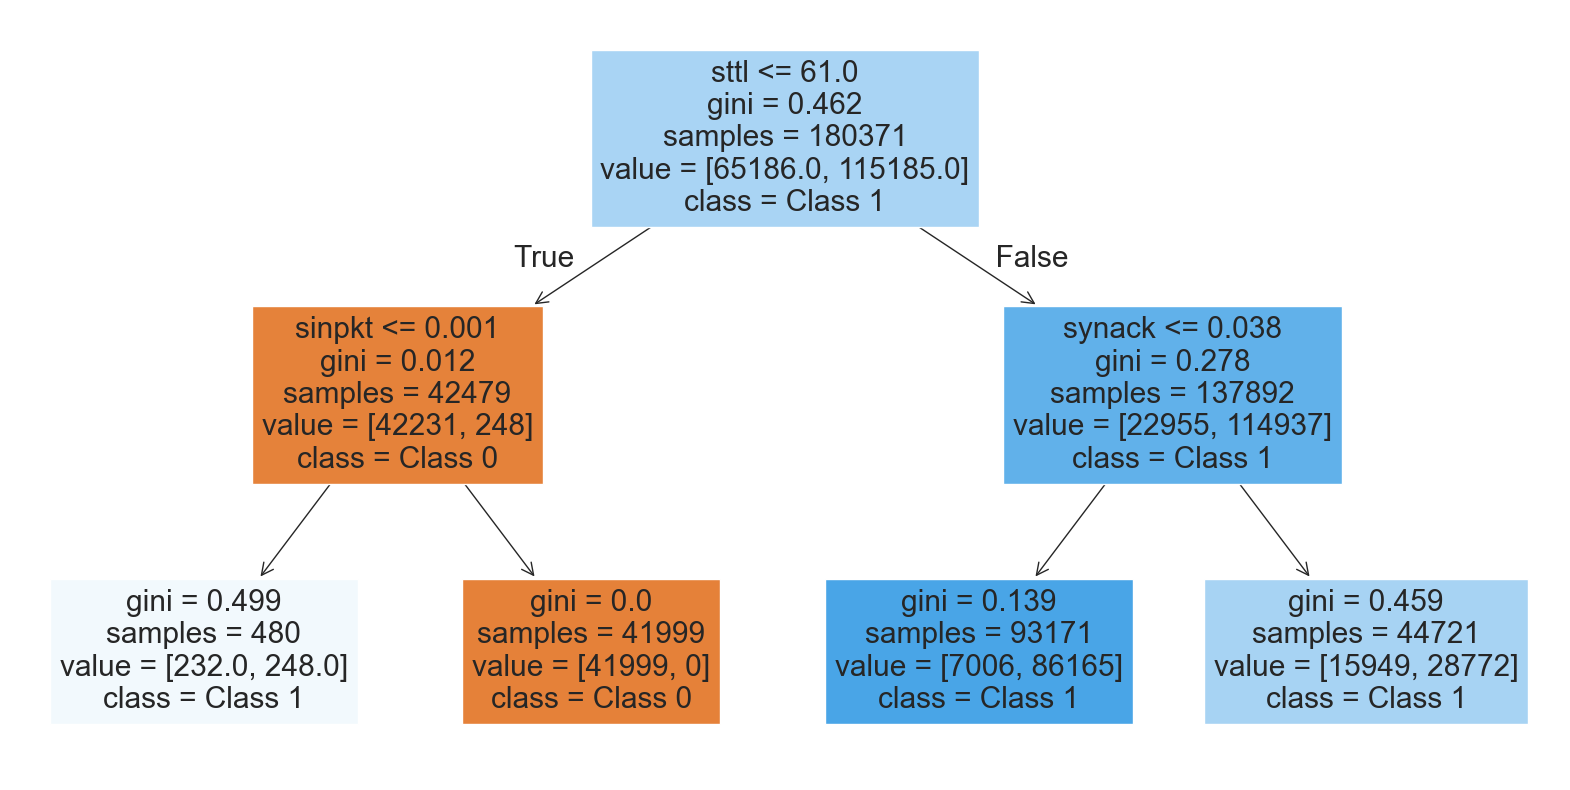

In [14]:
from sklearn.tree import export_text, plot_tree
from dtreeviz import dtreeviz
import matplotlib.pyplot as plt
import pandas as pd

# Ensure feature names match X_train
if isinstance(X_train, pd.DataFrame):
    feature_names = X_train.columns.tolist()
else:
    feature_names = [f'Feature_{i}' for i in range(X_train.shape[1])]

# Display decision rules
print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n", export_text(clf, feature_names=feature_names))

try:
    # Visualizing the decision tree with dtreeviz
    viz_model = dtreeviz(clf,
                         X_train=X_train,
                         y_train=y_train,
                         feature_names=feature_names,
                         target_name="Target",
                         class_names=["Class 0", "Class 1"])  # Adjust class names if needed
    viz_model.view()  # Render the visualization
except Exception as e:
    print(f"dtreeviz visualization failed: {e}")
    print("Falling back to sklearn's plot_tree visualization.")
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=feature_names, class_names=["Class 0", "Class 1"], filled=True)
    plt.show()


We create rules for those that are identified as potential attacks (class 1) in the decision tree. Then, filter out the testing set.

We apply our rules to the testing data and call them test_2.

In [15]:
X_test = X_test.reset_index(drop=True)

# filter out testing part based on our rules
rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

# getting the index of records to keep
ind = X_test.query(rules).index

# filtering test set (both X_test and y_test)
X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


Our simple rule-based system filtered 23% of network traffic for further analysis, demonstrating its efficacy in detecting non-threatening network activity. In practice, rule-based systems are more complex and capable of detecting the vast majority of non-threatening network traffic.

The next step involves using machine learning to detect cyber attacks by applying the trained model to the filtered data (test_2) from the previous step. It may be useful to introduce Snort, which is a powerful open-source detection software that can be utilized for network security.

## 5.2. Introducing Snort For Rule-Based System

Snort is a free and open-source rule-based system for network intrusion detection and prevention system (NIDPS) developed by Cisco. It uses rules to analyze network traffic and identify potential security threats based on specific patterns or behaviors. 

Snort comes with a set of pre-defined rules that can be used for basic intrusion detection. 

These rules are included in the "rules" directory in the Snort installation and can be enabled in the configuration file. 

The default rules cover a range of attack types, such as buffer overflows, SQL injection, and network scanning, and can be a good starting point for building a more customized intrusion detection system.
                                                                                                                                                
However, it's important to note that the default rules are not comprehensive and may not provide complete coverage for all possible attack scenarios.

## 6. Machine Learning Model For Cyber Attack Detection

The combination of machine learning and rule-based models offers several advantages in detecting cyber attacks:

Improved accuracy: Machine learning models can identify complex patterns and relationships in data, whereas rule-based models are limited by the explicit rules defined.
    
Enhanced interpretability: Rule-based models are easier to understand and interpret, making it easier to validate the results generated by machine learning models.
    
Increased speed: Machine learning models can quickly analyze large amounts of data, while rule-based models can make decisions faster in real-time.

Better scalability: Machine learning models can be easily updated and retrained on new data, while rule-based models can be difficult to update as the threat landscape changes.

Enriched data utilization: Both methods can complement each other by using different data sources and types, leading to a more comprehensive analysis.

### 6.1. Building a RandomForest Model

Random Forest is a good choice for cyber attack detection due to its high accuracy in classifying complex data patterns.

The ability to interpret the results of Random Forest models also makes it easier to validate and understand the decisions it makes, leading to more effective and efficient cyber security measures.


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

# Create a Random Forest model
rf = RandomForestClassifier(random_state=123)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_2)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test_2, y_pred)
rec = recall_score(y_test_2, y_pred)
per = precision_score(y_test_2, y_pred)
print("Recall: ", rec)
print("Percision: ", per)
print("Accuracy: ", acc)

Recall:  0.9574644358228257
Percision:  0.964559074993893
Accuracy:  0.9352797644089188


As we can see, the random forest algorithm showed strong performance in cyber attack detection. 

To gain better insight into the performance of our prediction model, let's plot a confusion matrix. 

It is important to note that the majority of our data contains actual attack information, as we filtered out some portion of non-threatening traffic in the previous step.

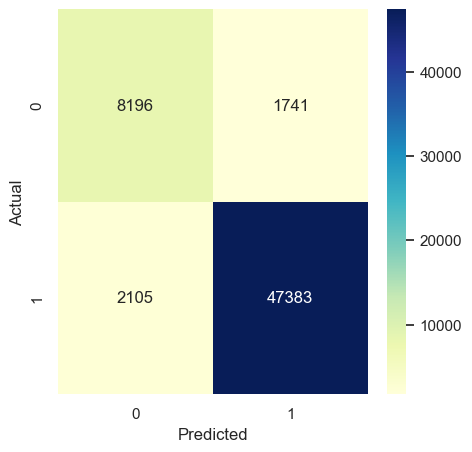

In [37]:
# plot confusion matrix
cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
plt.figure(figsize=(5, 5))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

To understand the functioning of the final tree in the random forest, we will print the rules present in the 100th tree to a file named Tree_output.txt.

You can access to the file by clicking file browser located in the left panel or pressing ctrl + shift + f (in Windows) and command + shift + f (in Mac).

This will allow us to have a visual representation of the tree and help to better understanding of how the model is making decisions to detect cyber attacks. 

The rules present in the tree can also be used as a reference for developing a rule-based system or for fine-tuning the model for better results. 

The output will also highlight the most important factors considered by the model for attack detection, which can be useful for further analysis and optimization.

In [39]:
# save the 100th tree sample in random forest in the file 
from sklearn.tree import export_text
feature_names = list(X.columns)

# Create a file and write to it
with open("Tree_output.txt", "w") as file:
    print(export_text(rf.estimators_[99], 
            spacing=3, decimals=2,
            feature_names=feature_names), file=file)

### Exercise: try GBM classifier with grid search on the parameters


## 7. Human Analysis

In addition to these automated methods, human analysis can play a critical role in identifying cyber attacks.

Human analysis is important in identifying cyber attacks.
    
Analysts use their expertise to interpret data and understand the context of an attack.

Understanding key variables in network data is crucial for effective human analysis in detecting cyber attacks.

### 7.1. Correlations In The Dataset

To improve our understanding of the variables involved in cyber attack detection, we need to analyze the network data. 

Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with cyber attacks.

Additionally, random forest models can help identify the importance of different features in predicting the target variable (cyber attacks).

We can compare the feature rankings from the random forest with the results of the correlation analysis to gain a better understanding of the key features to focus on for effective cyber attack detection.

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

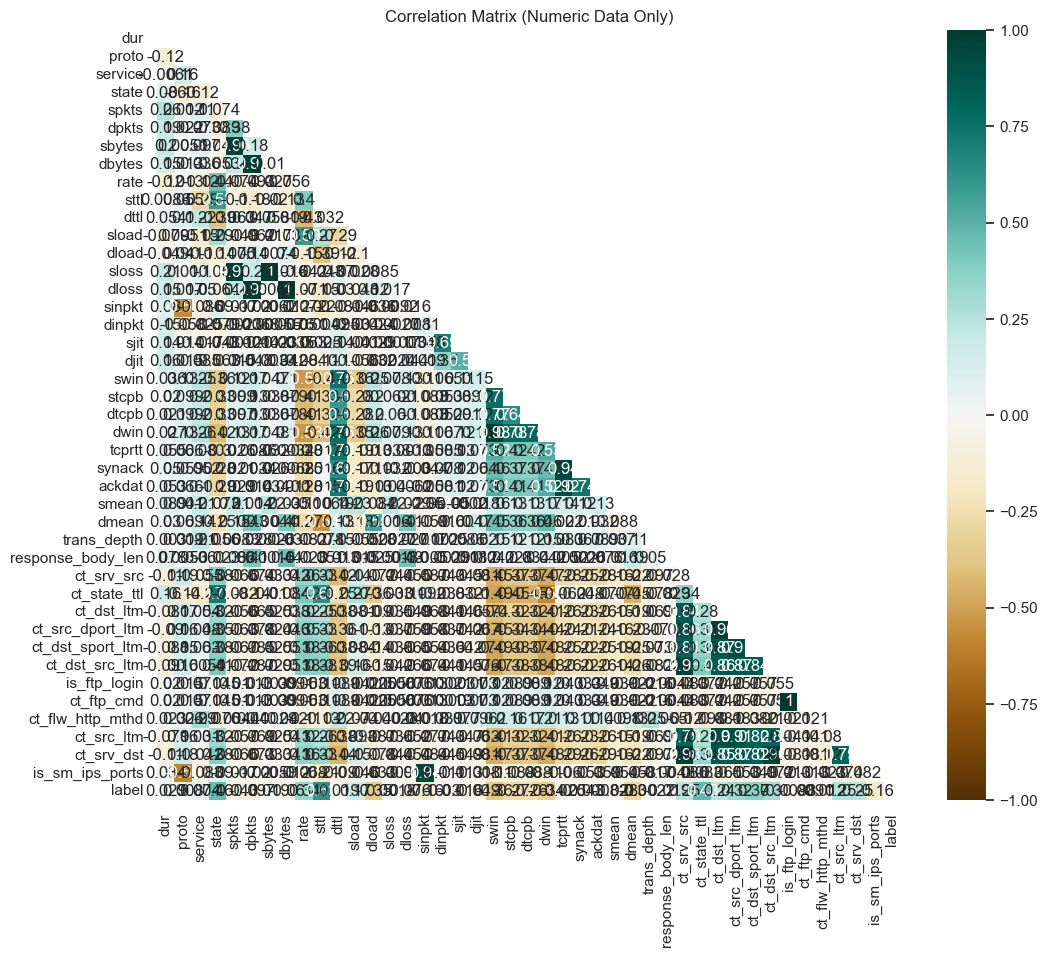

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Create the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(numeric_df.corr(), dtype=bool))  # Fixed deprecated np.bool
sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, cmap='BrBG', mask=mask, annot=True)
plt.title('Correlation Matrix (Numeric Data Only)')
plt.show()


<Figure size 1000x1000 with 0 Axes>

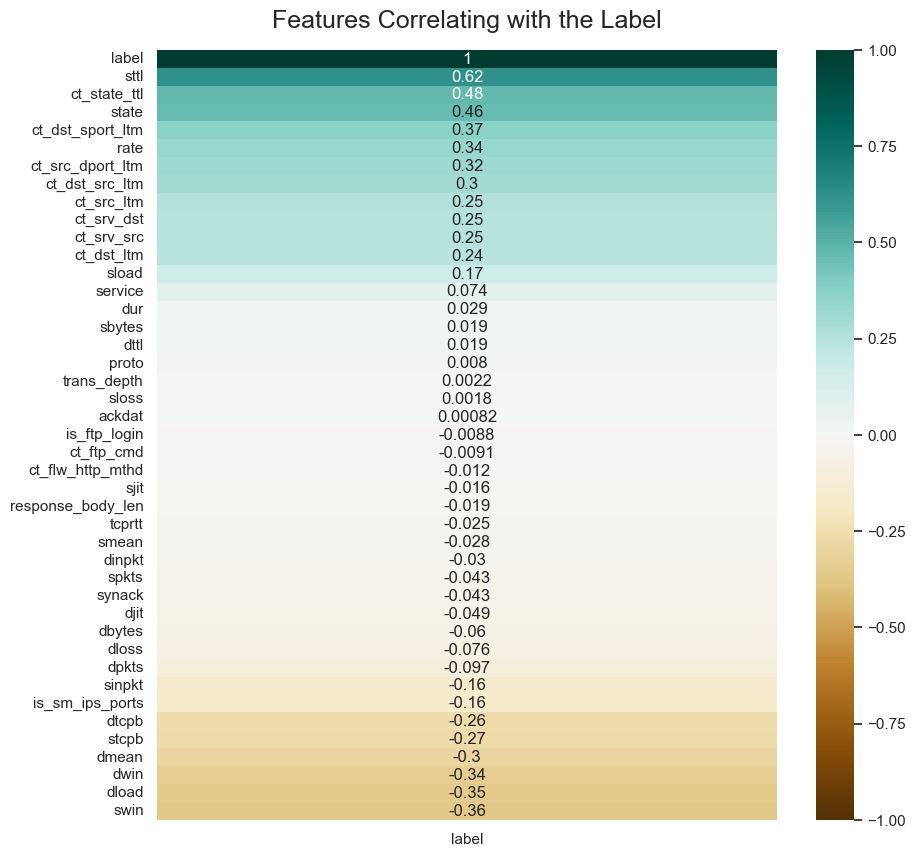

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure 'label' is numeric (encode if necessary)
if df['label'].dtype == 'object':
    df['label'] = df['label'].astype('category').cat.codes

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Create the heatmap for correlation with the 'label'
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(numeric_df.corr()[['label']].sort_values(by='label', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize': 18}, pad=16)
plt.show()


The following variables are positively correlated with cyber attacks:

> - `sttl`: Source to destination time to live value. Attackers may use techniques such as packet fragmentation or tunneling to avoid detection or bypass security measures, which can increase the number of hops or decrease the TTL value. A higher value for sttl may be indicative of such techniques.  
> - `ct_state_ttl` and `state`: These features reflect various stages of TCP connections and may be related to port scanning, SYN flood, or DDoS attacks. Attackers may exploit the state of TCP connections using different techniques, which may be reflected in the values of ct_state_ttl and state.
> - `ct_dst_sport_ltm`: This feature measures the number of connections from the same source IP to the same destination port in a short time period. Attackers may initiate multiple connections to the same port in a short time period to exploit vulnerabilities or launch attacks against a particular service or application, which may be reflected in a higher value for ct_dst_sport_ltm.
> - `rate`: This feature may represent various types of traffic rates or frequencies. Attackers may generate high traffic rates or bursts of traffic to overwhelm or bypass security measures, which may be reflected in a higher value for rate.

In contrast, the following variables are negatively correlated with cyber attacks:

> - `swin`: The size of the TCP window may decrease during an attack when attackers try to flood the network with traffic. A lower value for swin may be indicative of such attacks.
> - `dload`: A decrease in the download speed may be indicative of an attack that consumes network bandwidth, such as DDoS attacks or worm propagation. A lower value for dload may be reflective of such attacks.

### 7.2. Feature Ranking From Random Forest

The random forest provides a list of features based on their contributions to the prediction model.
The feature ranking can be accessed through RandomForest object (in our example `rf`) using `feature_importances_` attribute.

In [52]:
# creating of ranking data frame
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

# sorting the features based on their importance value
feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

# show only 10 most important feature in style of gradien of colores
feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.139708
1,ct_state_ttl,0.107578
2,rate,0.052387
3,dload,0.049926
4,sload,0.047473
5,sbytes,0.040504
6,ct_dst_src_ltm,0.040064
7,smean,0.039948
8,ct_srv_dst,0.036520
9,dbytes,0.034286


In [53]:
# plot the important features
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)

<Axes: >

As we can see, the feature importance ranking is aligned with correlation result. This highlights the importance of top features such `sttl`, `ct_stat_ttl`, `rate`, and `dload`. 


Following is a brief description of some of these important features (a full list of features is available at the end of this notebook).

|No.|Name            |Type     |Description                                                                                                                                                       |
|---|----------------|---------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|10 |sttl            |Integer  |Source to destination time to live value |
|37 |ct_state_ttl    |Integer  |No. for each state (6) according to specific range of values for source/destination time to live (10) (11)(see the full list at the end of this project to find no 6,10,11).                                                       |
|9  |rate          |Integer  |Destination to source transaction bytes|
|16 |Dload           |Float    |Destination bits per second  |
|15 |Sload           |Float    |Source bits per second  |                                                                                                                                       
|47 |ct_dst_src_ltm  |integer  |No of connections of the same source (1) and the destination (3) address in in 100 connections according to the last time (26).                                   |
|23 |smeansz         |integer  |Mean of the ?ow packet size transmitted by the src                                                                                                                |
|8  |sbytes          |Integer  |Source to destination transaction bytes                                                                                                                           |
|22 |dtcpb           |integer  |Destination TCP base sequence number                                                                                                                              |
|42 |ct_srv_dst      |integer  |No. of connections that contain the same service (14) and destination address (3) in 100 connections according to the last time (26).                             |
|6  |state           |nominal  |Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)    |
|46 |ct_dst_sport_ltm|integer  |No of connections of the same destination address (3) and the source port (2) in 100 connections according to the last time (26).                                 |
|7  |dur             |Float    |Record total duration                                                                                                                                             


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select top 10 features
top10 = feature_imp.Name[:10].tolist()
X = df[top10]
y = df['label'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Train RandomForest
rf_top10 = RandomForestClassifier(random_state=11)
rf_top10.fit(X_train, y_train)

# Ensure feature alignment
X_test = X_test[X_train.columns]

# Predict and evaluate
y_pred = rf_top10.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9418255672556984


Let's select only the top 10 features and find their associations with the type of cyber attack.


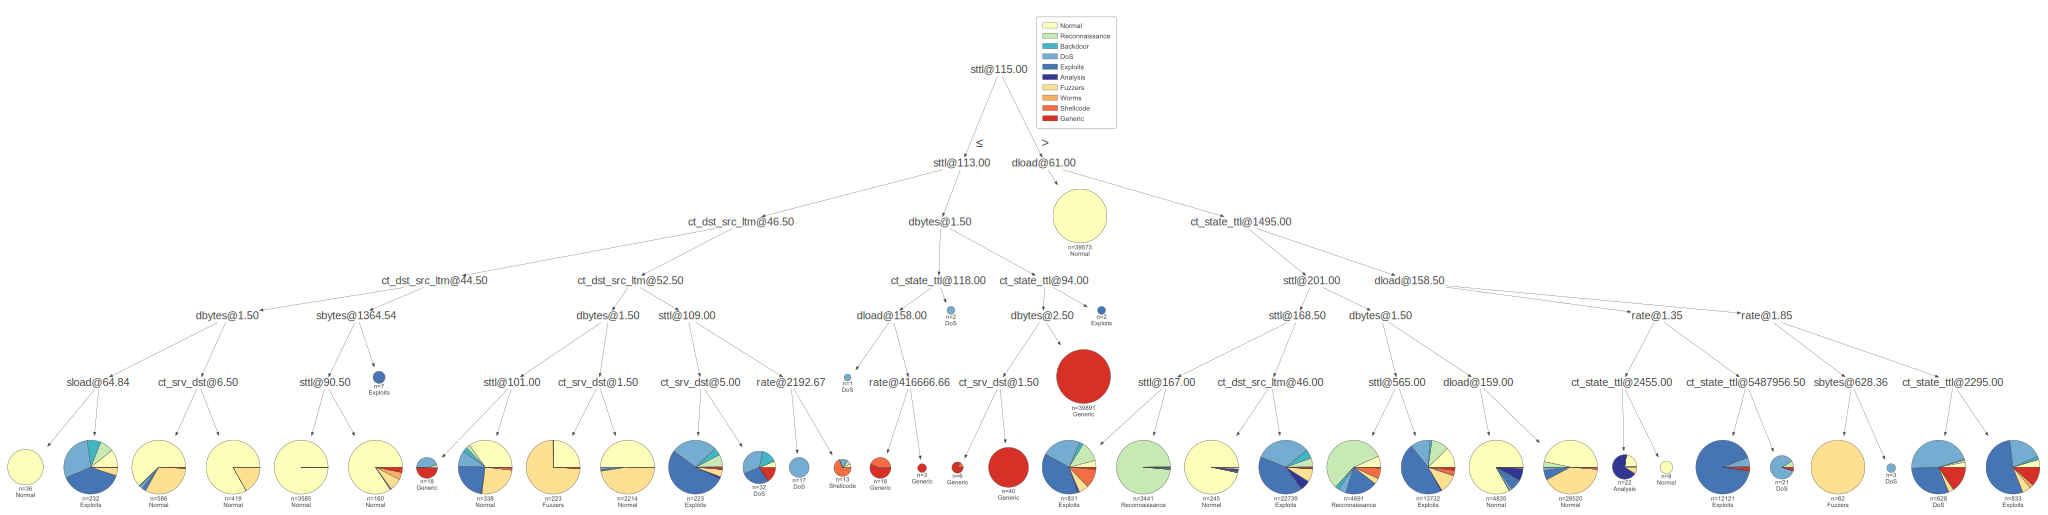

In [55]:
# get the names of top 10 features
top10= feature_imp.Name[:10].tolist()

# get the attack names
attack_names = np.array(df['attack_cat'].unique())

# selecting only top 10 features
X_top = df.loc[:, df.columns.isin(top10)]
# need to convert the catagorical data into numbers (e.g. normal ->0, Blackdoor ->2)
y_top = pd.factorize(df['attack_cat'])[0]


# for the purpose of visualization we set max_depth to 6 in order to be shown in the notebook
clf_top10 = DecisionTreeClassifier(max_depth=6)

# Split the data into train and test sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

# Train the model on the training data
clf_top10.fit(X_train_top, y_train_top)

# visualizing the tree
viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top, 
                           class_names=attack_names,
                           feature_names=top10)

v = viz_model.view(fancy=False,scale=1) # render as SVG into internal object 
v
#v.save("The_100th_tree.svg") # if you willing to save the 

For a better understanding, we can randomly select a point and visualize the path for prediction.


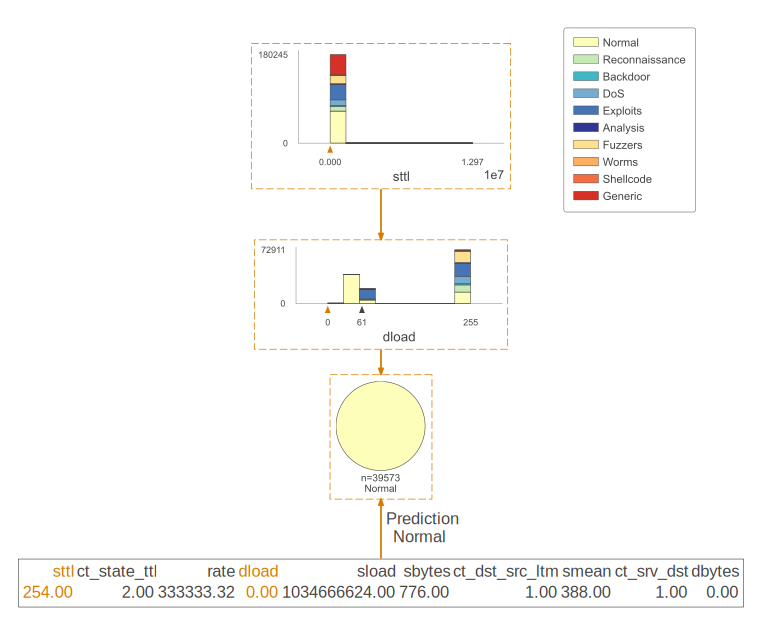

In [57]:
# get a random point
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand,:].values

# visualizing the path for the point
v = viz_model.view(fancy=True,scale=1.5,x=sample_point,show_just_path=True)
v

In [58]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

# X = df.loc[:, ~df.columns.isin(['attack_cat', 'label'])] # if you like to use all features use this line
y = df['attack_cat'].values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Create a Random Forest model
rf = RandomForestClassifier(random_state=123,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the mean absolute error of the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")

Accuracy:  0.8246875889368969


<Axes: xlabel='col_0', ylabel='row_0'>

### 7.3 Discussing The Network Variables and Their Role in Detecting Different Types of Cyber Attacks.


Let's discuss about some of the important features for detecting the type of cyber attack.

`sttl`: Source to destination time to live value can be used to detect attacks such as packet fragmentation or tunneling that can increase the number of hops or decrease the TTL value. These techniques are often used by attackers to avoid detection or bypass security measures. A higher value for sttl may indicate the presence of such techniques.

`ct_state_ttl` and `state`: These features reflect the various stages of TCP connections and can be related to port scanning, SYN flood, or DDoS attacks. Attackers can exploit the state of TCP connections using different techniques, which may be reflected in the values of ct_state_ttl and state.

`rate`: This feature can represent various types of traffic rates or frequencies. Attackers may generate high traffic rates or bursts of traffic to overwhelm or bypass security measures, which may be reflected in a higher value for rate.

`dload`: A decrease in the download speed may indicate an attack that consumes network bandwidth, such as DDoS attacks or worm propagation. A lower value for dload may be reflective of such attacks.

The different types of attacks can have different characteristics that can be detected using network variables. For example, DoS attacks aim to disrupt the normal functioning of a system, so an increase in the rate of traffic or a decrease in the download speed may indicate the presence of such an attack. Port scanning, SYN flood, and DDoS attacks can be reflected in the values of ct_state_ttl and state. Fuzzers and analysis attacks may involve generating large amounts of traffic, which can be reflected in the value of rate. Reconnaissance attacks involve gathering information about a target system, which can potentially be detected by analyzing network traffic. Finally, shellcode and worm attacks can be detected by analyzing the content of network packets.


In [62]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import numpy as np

# Encode the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Convert data types
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
y_train = np.array(y_train).astype('int')
y_test = np.array(y_test).astype('int')

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Detect the number of classes
num_classes = len(np.unique(y_train))

# Define the DNN model
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

if num_classes == 2:
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
else:
    model.add(Dense(num_classes, activation='softmax'))  # Multi-class classification
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,202 (313.29 KB)

 Trainable params: 80,202 (313.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
5637/5637 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.7308 - loss: 0.7326 - val_accuracy: 0.7800 - val_loss: 0.5757
Epoch 2/5
5637/5637 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7742 - loss: 0.5852 - val_accuracy: 0.7830 - val_loss: 0.5565
Epoch 3/5
5637/5637 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7824 - loss: 0.5582 - val_accuracy: 0.7881 - val_loss: 0.5400
Epoch 4/5
5637/5637 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7816 - loss: 0.5523 - val_accuracy: 0.7692 - val_loss: 0.5640
Epoch 5/5
5637/5637 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.7832 - loss: 0.5450 - val_accuracy: 0.7905 - val_loss: 0.5223
